Importing required libraries 

# Mental Health Sentiment Analysis 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from imblearn.over_sampling import RandomOverSampler

In [2]:
dataset = pd.read_csv("mental health.csv",encoding = "unicode_escape")

In [3]:
dataset.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [4]:
dataset.isna().sum()

Unnamed: 0      0
statement     363
status          2
dtype: int64

In [5]:
# dataset.shape
dataset.columns

Index(['Unnamed: 0', 'statement', 'status'], dtype='object')

In [6]:
dataset.dropna(inplace = True, axis=0)

In [7]:
dataset.shape

(52680, 3)

In [8]:
dataset.isna().sum()

Unnamed: 0    0
statement     0
status        0
dtype: int64

In [9]:
dataset.status.value_counts()

status
Normal                  16343
Depression              15404
Suicidal                10651
Anxiety                  3841
Bipolar                  2777
Stress                   2587
Personality disorder     1077
Name: count, dtype: int64

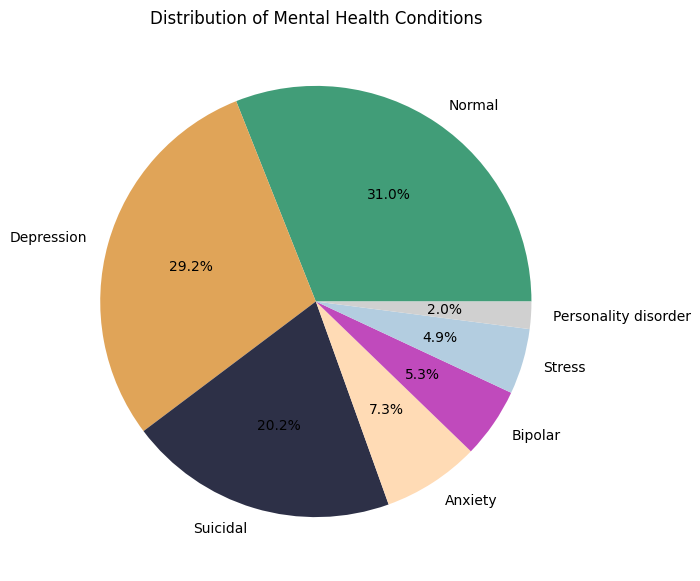

In [10]:
# Count the occurrences of each category
status_counts = dataset['status'].value_counts()

# Define colors for each category (7 colors)
colors = ['#419D78', '#E0A458', '#2D3047', '#FFDBB5', '#C04ABC', '#B3CDE0', '#D0D0D0']

# Create the pie chart
plt.figure(figsize=(7, 7))
plt.pie(status_counts, labels=status_counts.index, colors=colors, autopct='%1.1f%%')

plt.title('Distribution of Mental Health Conditions')

# Display the chart
plt.show()

 dataset is imbalanced 

In [11]:
x = dataset[["statement"]]
y = dataset["status"]

In [12]:
ros = RandomOverSampler()
ros_x ,  ros_y = ros.fit_resample(x,y)

In [13]:
ros_y.value_counts()

status
Anxiety                 16343
Normal                  16343
Depression              16343
Suicidal                16343
Stress                  16343
Bipolar                 16343
Personality disorder    16343
Name: count, dtype: int64

now dataset is balanced

In [14]:
X = np.array(ros_x)
Y = np.array(ros_y)

In [15]:
df = pd.DataFrame(Y,X)


In [16]:
df.head()

,0
"(oh my gosh,)",Anxiety
"(trouble sleeping, confused mind, restless heart. All out of tune,)",Anxiety
"(All wrong, back off dear, forward doubt. Stay in a restless and restless place,)",Anxiety
"(I've shifted my focus to something else but I'm still worried,)",Anxiety
"(I'm restless and restless, it's been a month now, boy. What do you mean?,)",Anxiety


In [17]:
df.to_csv("dataset1.csv")

In [18]:
dataset1 = pd.read_csv("dataset1.csv",encoding = "unicode_escape")
dataset1.columns = ['statement', 'status']

In [19]:
dataset1.head()

,statement,status
0,"('oh my gosh',)",Anxiety
1,"('trouble sleeping, confused mind, restless he...",Anxiety
2,"('All wrong, back off dear, forward doubt. Sta...",Anxiety
3,"(""I've shifted my focus to something else but ...",Anxiety
4,"(""I'm restless and restless, it's been a month...",Anxiety


In [20]:
dataset1['status'].value_counts()

status
Anxiety                 16343
Normal                  16343
Depression              16343
Suicidal                16343
Stress                  16343
Bipolar                 16343
Personality disorder    16343
Name: count, dtype: int64

In [21]:
X = np.array(dataset1["statement"])
Y = np.array(dataset1["status"])

In [22]:
cv = CountVectorizer()
cv_x = cv.fit_transform(X)

In [23]:
cv_x

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 8725148 stored elements and shape (114401, 59957)>

In [24]:
x_train , x_test, y_train , y_test = train_test_split(cv_x,Y,test_size = 0.2 , random_state = 42)

In [25]:
from sklearn.linear_model import LogisticRegression

In [26]:
# model = MultinomialNB()
# model.fit(x_train,y_train)
model = LogisticRegression()
model.fit(x_train,y_train)

C:\Users\ASUS\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
model.score(x_test,y_test)*100

84.04352956601548

In [28]:
user = input("Enter a text")
data = cv.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter a text i m feling very low


['Normal']


In [29]:
accuracy = model.score(x_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")


Accuracy: 84.04%


In [30]:
import pickle

# Save the trained model
with open("model.pkl", "wb") as model_file:
    pickle.dump(model, model_file)

# Save the vectorizer (like CountVectorizer or TfidfVectorizer)
with open("vectorizer.pkl", "wb") as vec_file:
    pickle.dump(cv, vec_file)
